In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


There is no null values in the dataset. Let's move into the EDA part using visualization technique.

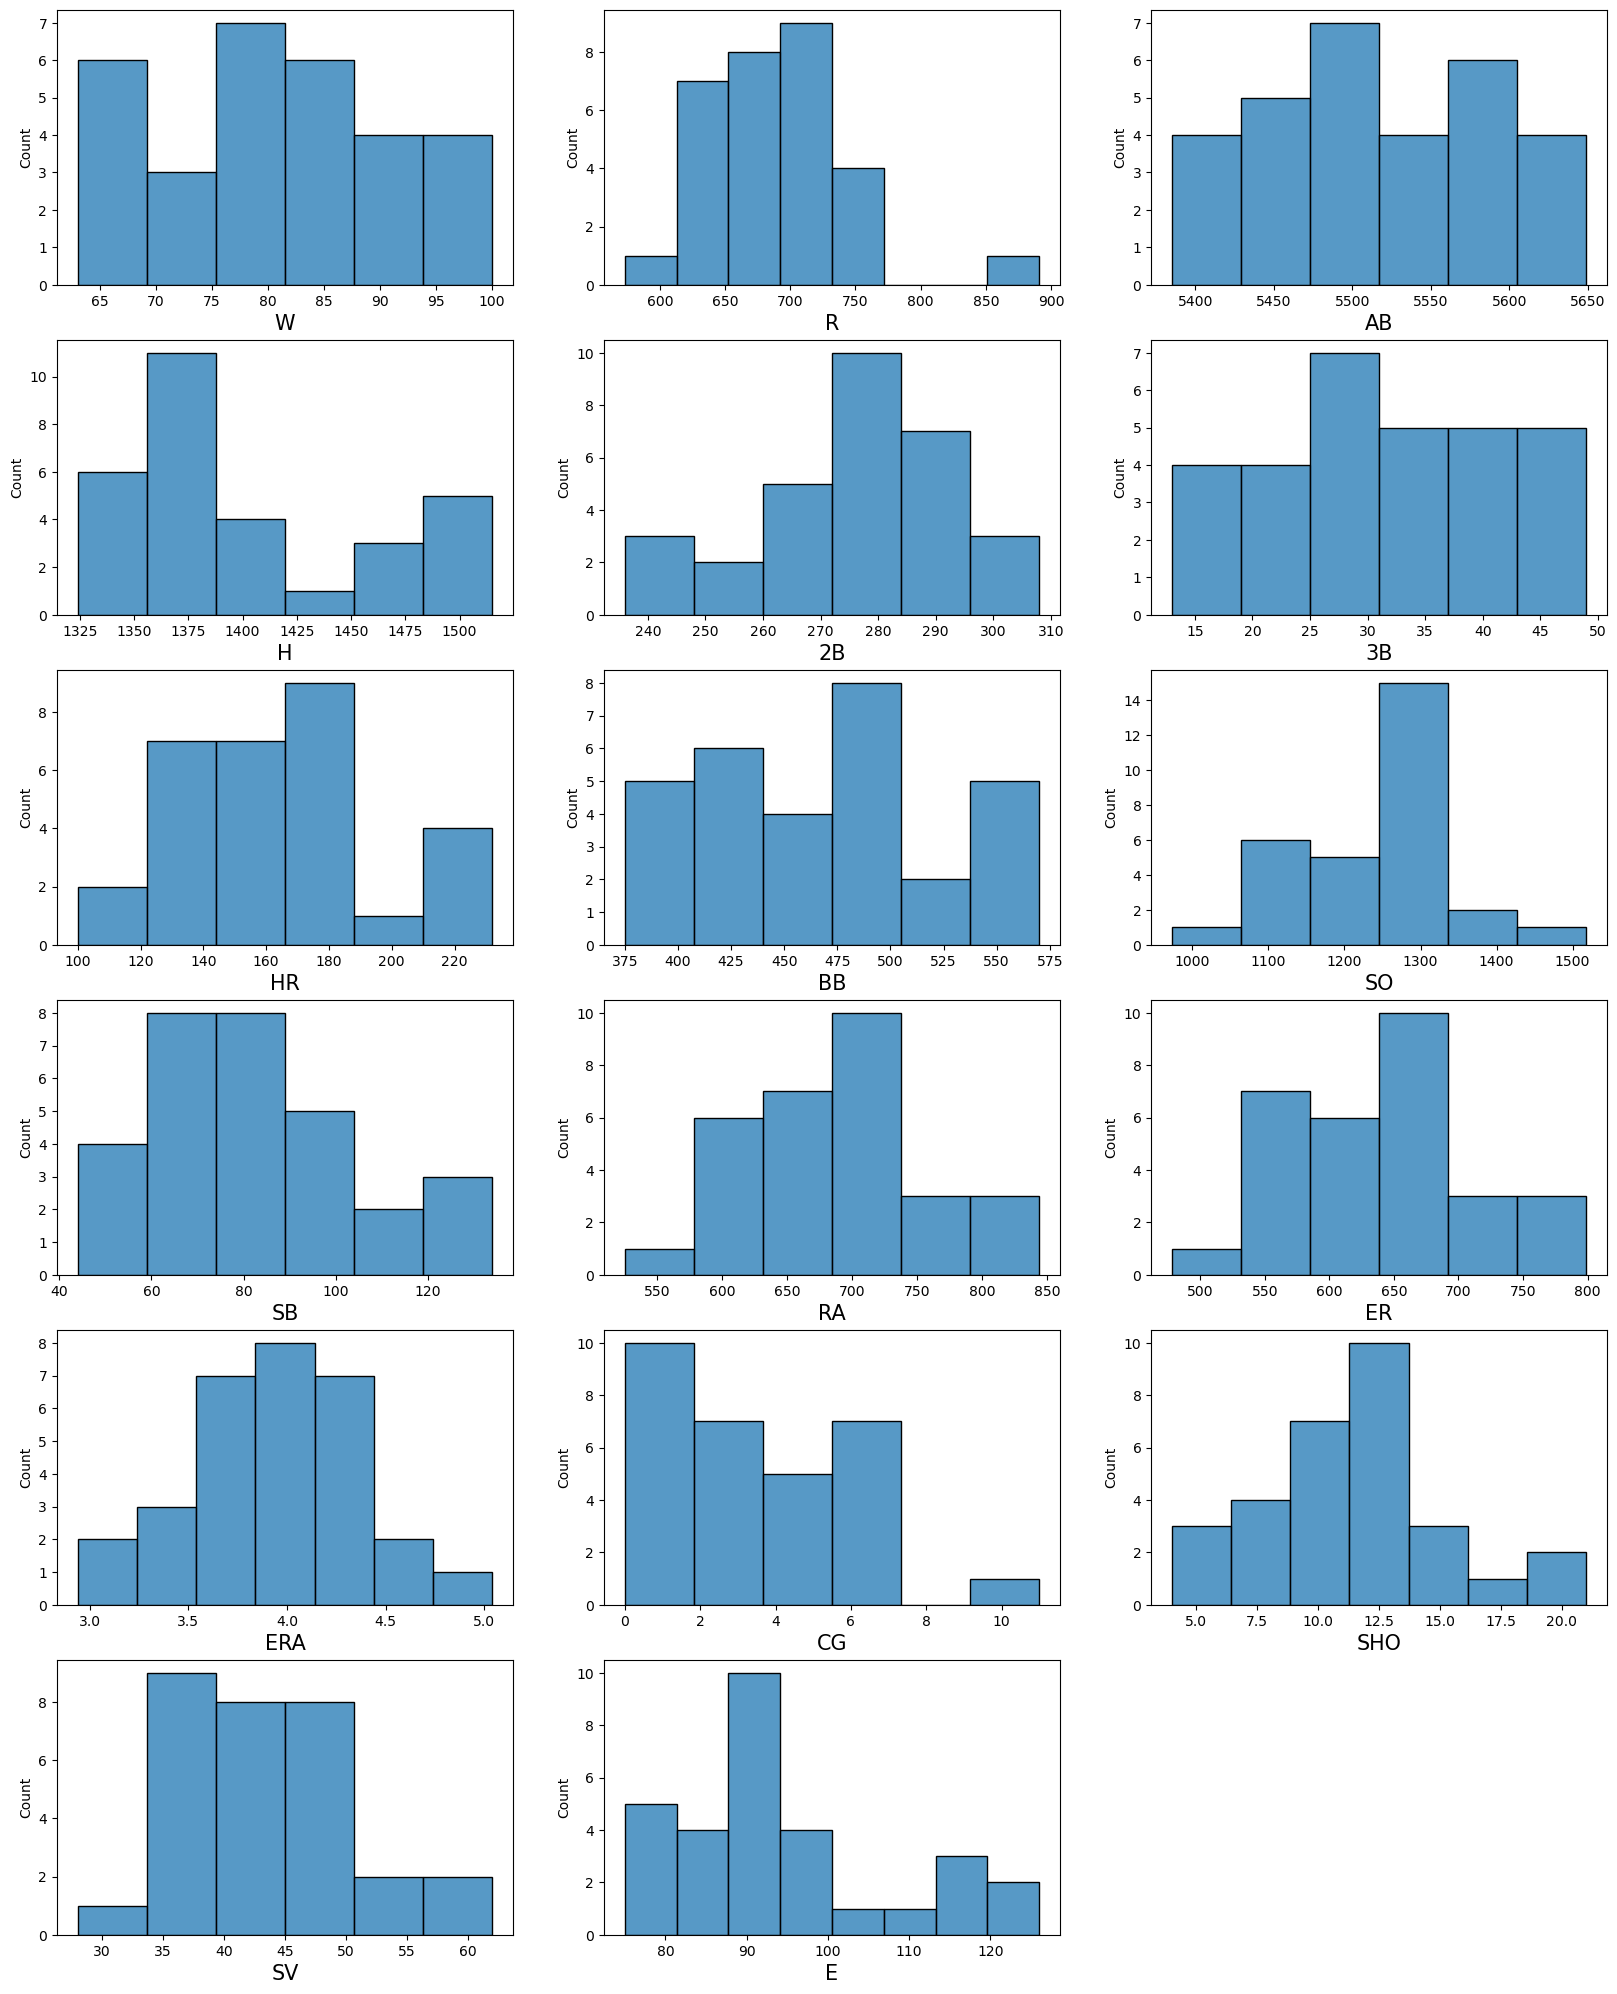

In [12]:

plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

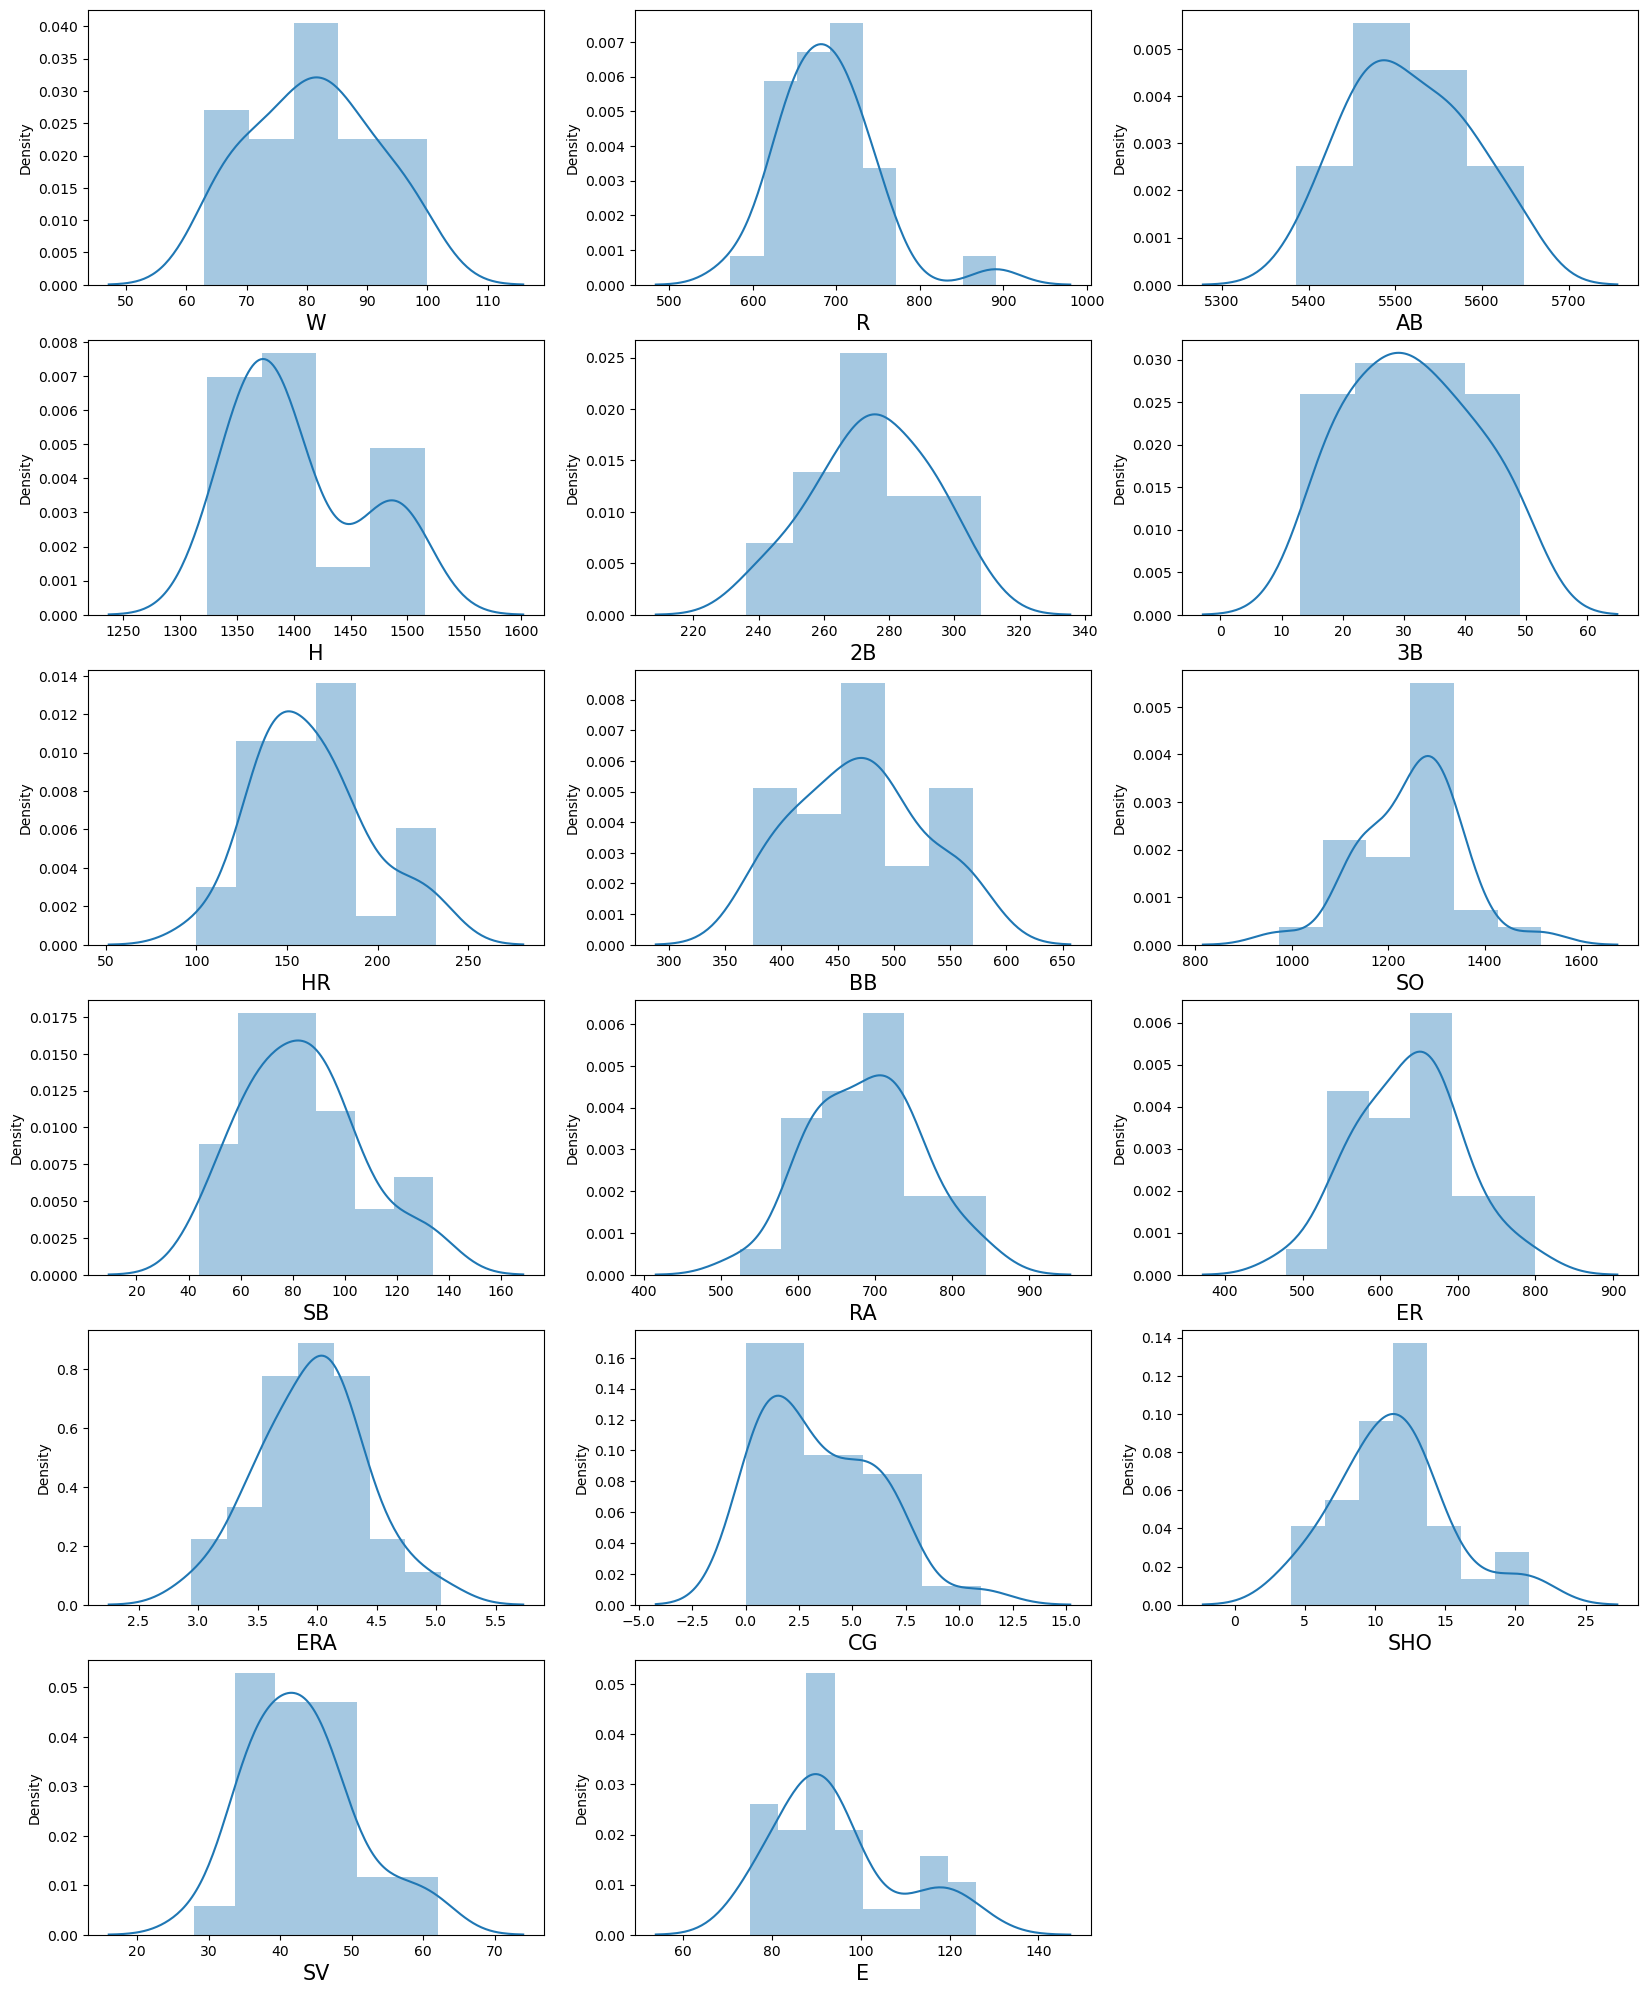

In [14]:
#checking the distribution of data set
plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In above graphs I assume that the data follows the normal distribution.Now let's check some outliers. 

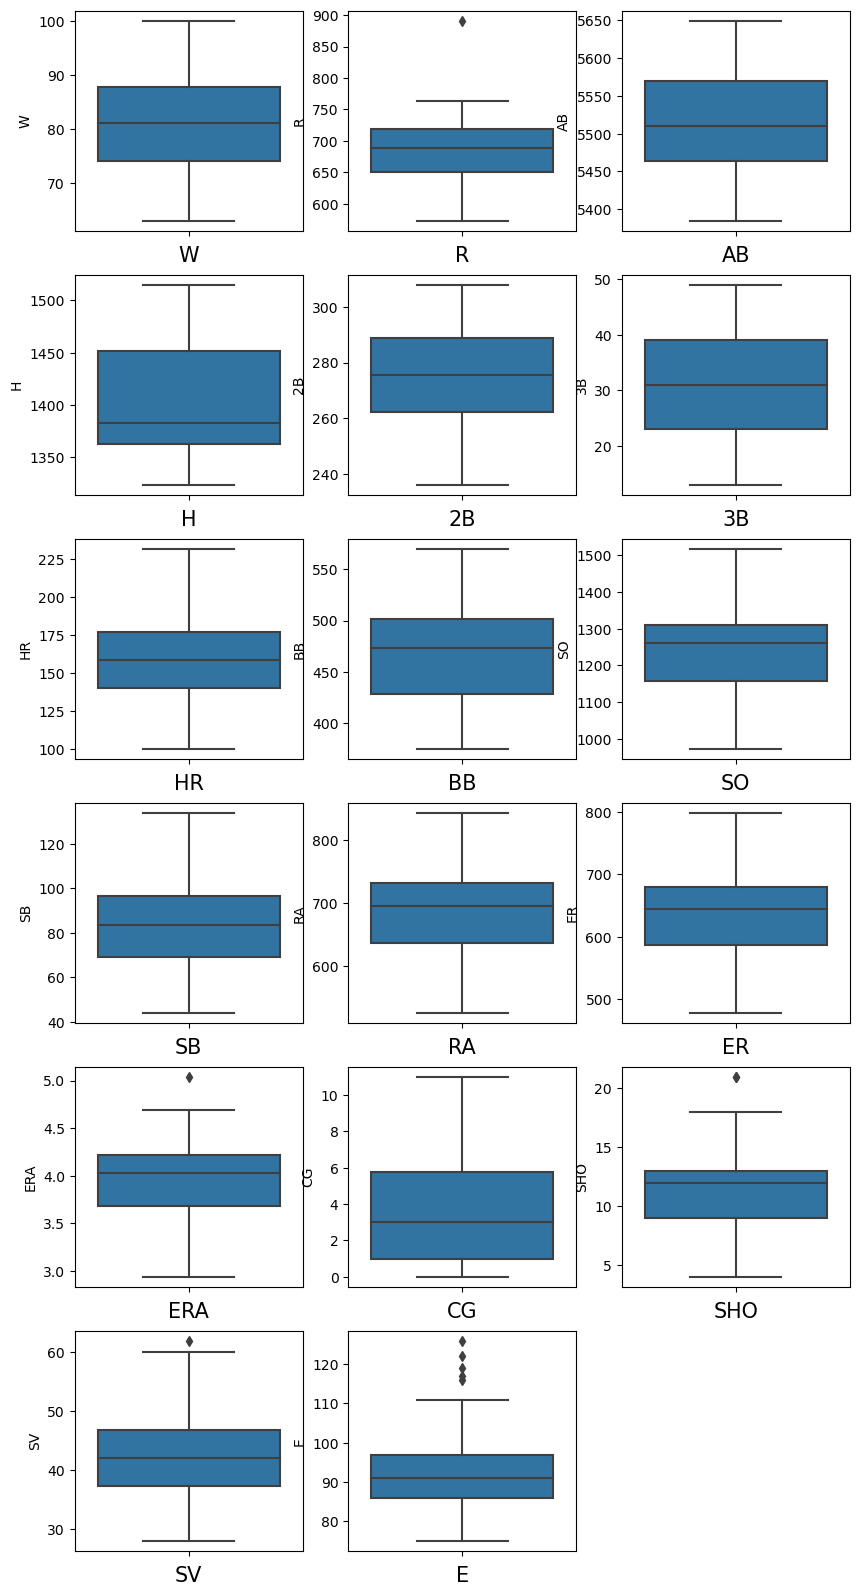

In [22]:
# checking the outiler

plt.figure(figsize=(10,20))
plotnumber =1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Here some outliers present in following features:-
R(Runs), ERA(Earned Run Average), SHO(Shutouts), SV(Saves), E(Errors)
Later we have to treat these outliers.

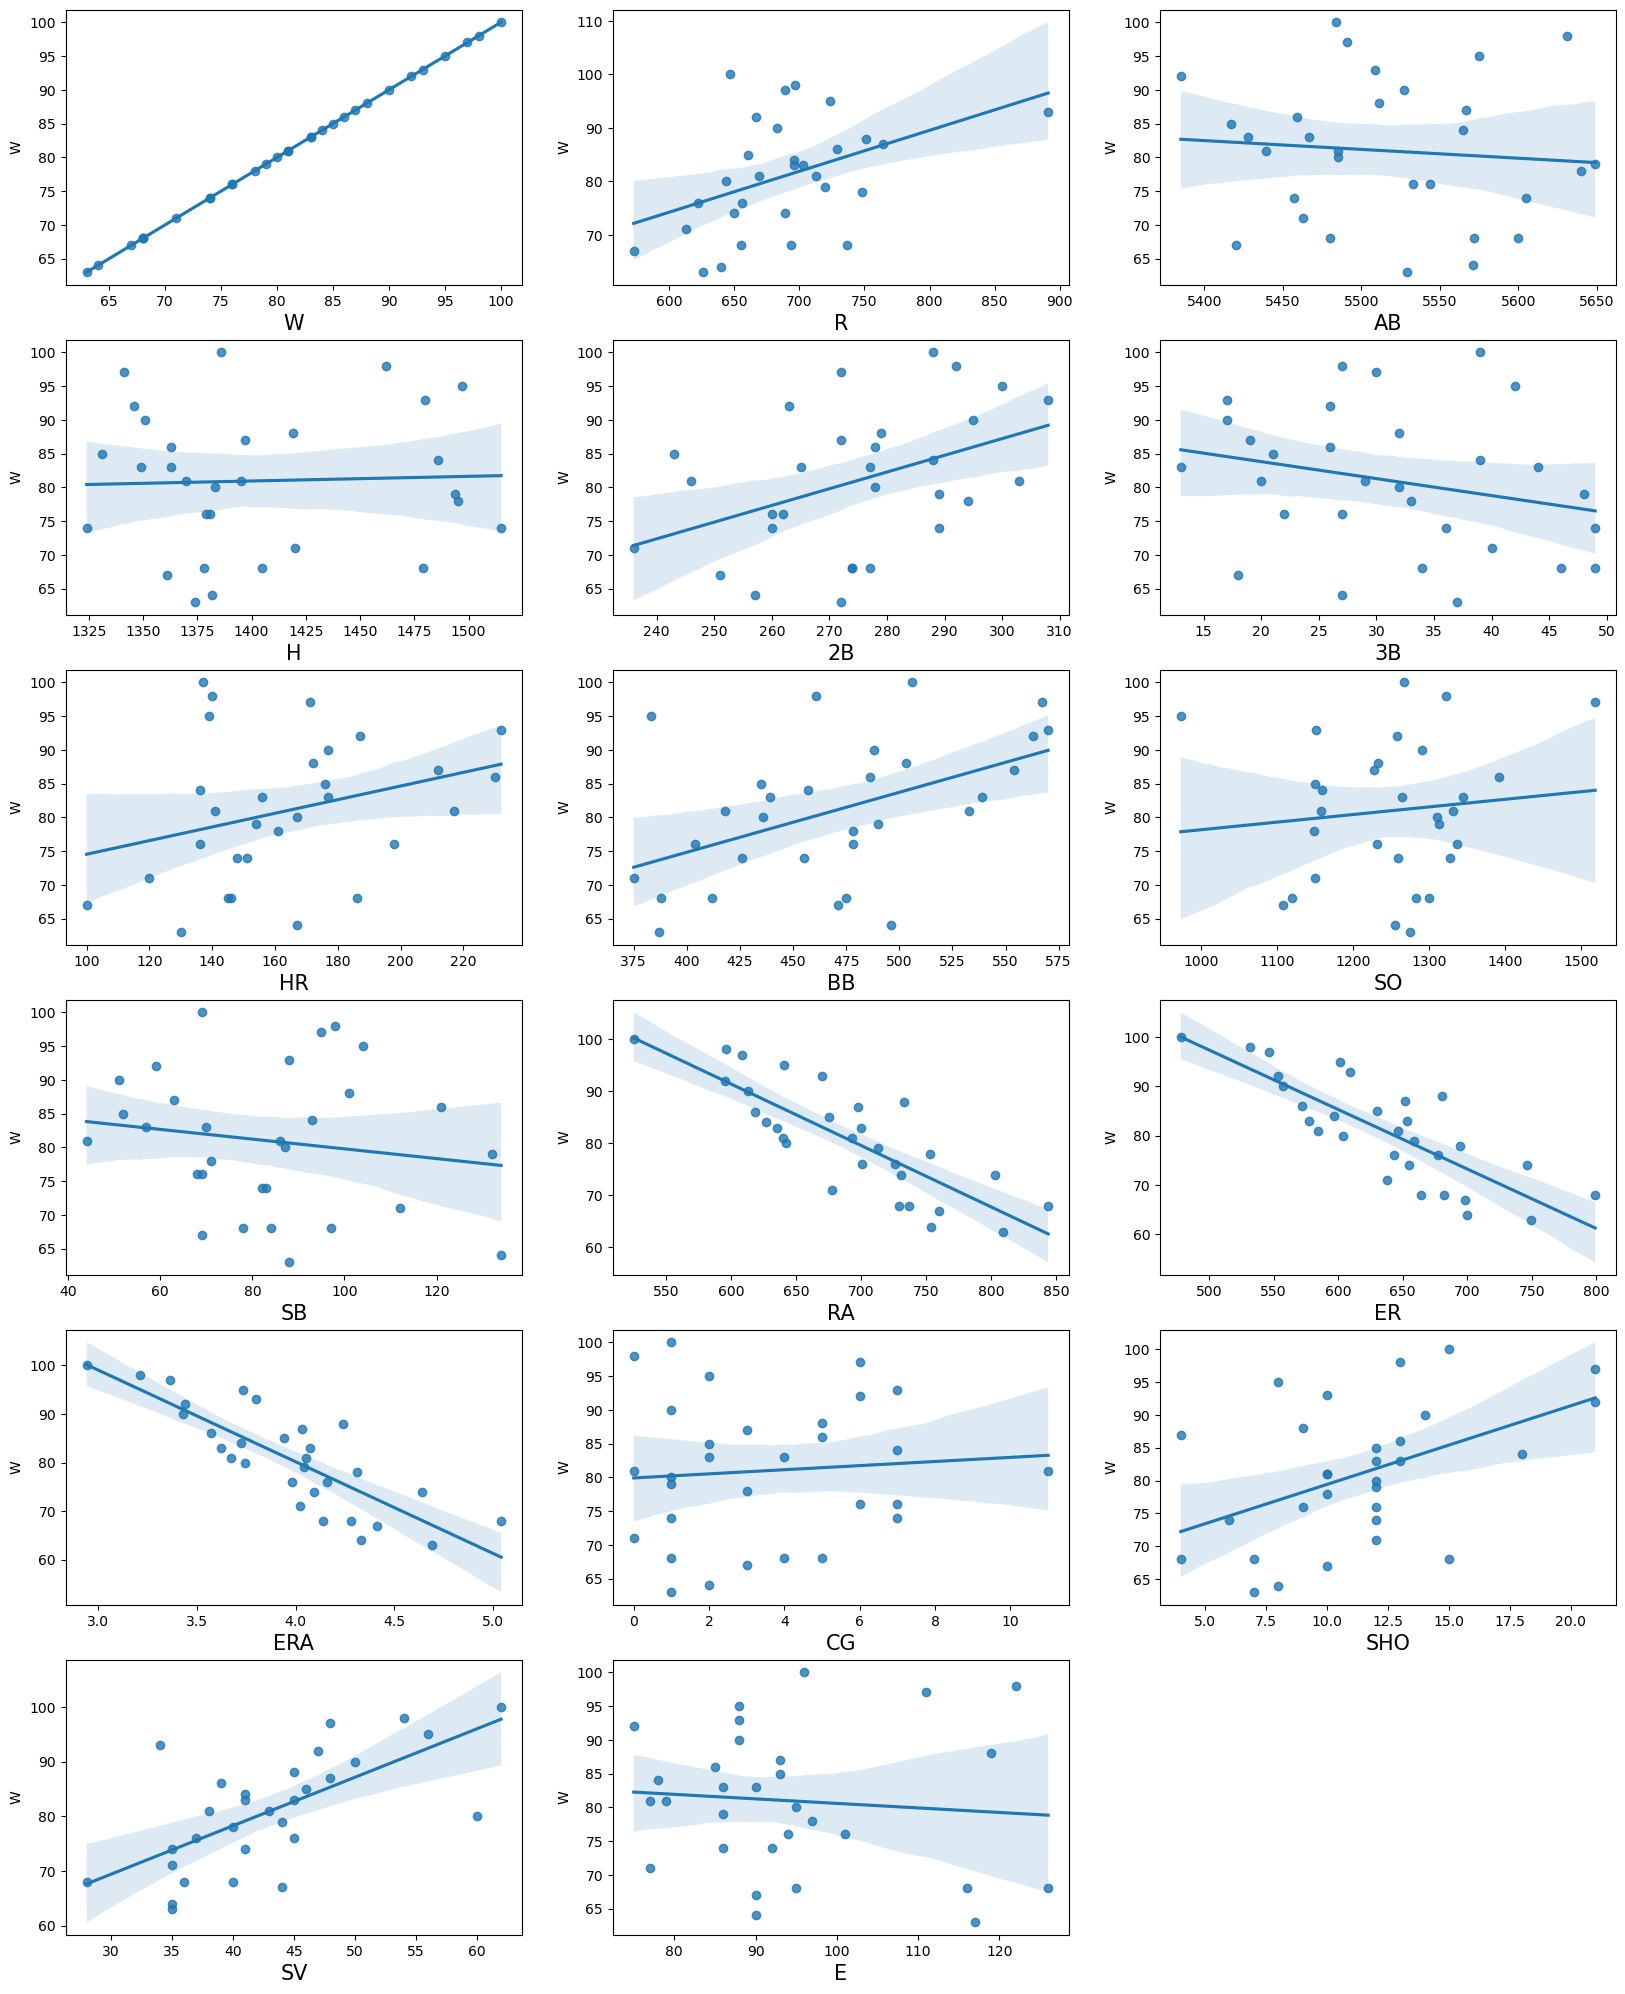

In [30]:
# visualize the relationship with W(Win){features with label}

plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.regplot(x=df[column], y='W',data=df)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Some feature have linearly correlated with label (Win),
Some have weak correlated,
Some feature have negative correlation with label.

Let's plot heatmap and check the relationship.

In [35]:
df_cor = df.corr()

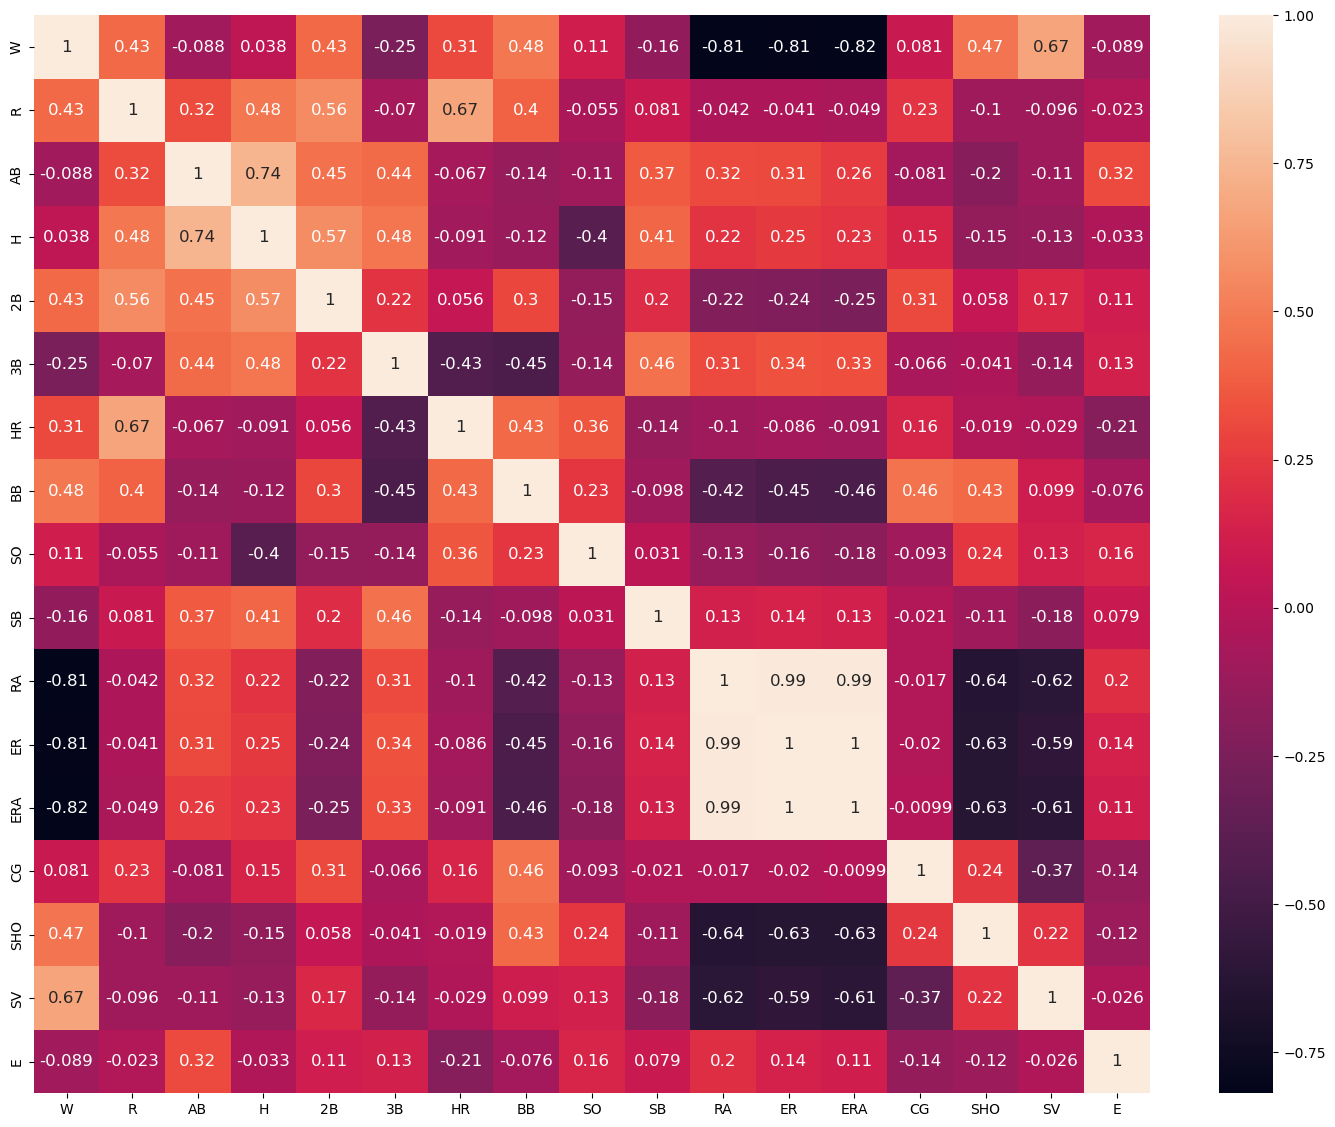

In [34]:
# ploting Heatmap

plt.figure(figsize=(18,14))
sns.heatmap(df_cor, annot=True, annot_kws={'size':12})
plt.show()

R(runs)-0.43, HR(home runs)-0.31, 2B(doubles)-0.43, SV(saves)-0.67, SHO(shutouts)-0.47, and BB(walks)-0.48 are highly +ve linearly correlated.
ERA-0.82, RA-0.81, ER-0.81 are highly negative linearly correlated.
Remaining features have less linear correlation with wins.


In [36]:
# Handling outliers from R column R(Runs), ERA(Earned Run Average), SHO(Shutouts), SV(Saves), E(Errors)

Q1= np.percentile(df['R'],25)
Q3= np.percentile(df['R'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['R']>outlier_down) & (df['R']<outlier_up)]

In [38]:
Q1= np.percentile(df['ERA'],25)
Q3= np.percentile(df['ERA'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['ERA']>outlier_down) & (df['ERA']<outlier_up)]

In [39]:
Q1= np.percentile(df['SHO'],25)
Q3= np.percentile(df['SHO'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['SHO']>outlier_down) & (df['SHO']<outlier_up)]

In [40]:
Q1= np.percentile(df['SV'],25)
Q3= np.percentile(df['SV'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['SV']>outlier_down) & (df['SV']<outlier_up)]

In [41]:
Q1= np.percentile(df['E'],25)
Q3= np.percentile(df['E'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['E']>outlier_down) & (df['E']<outlier_up)]

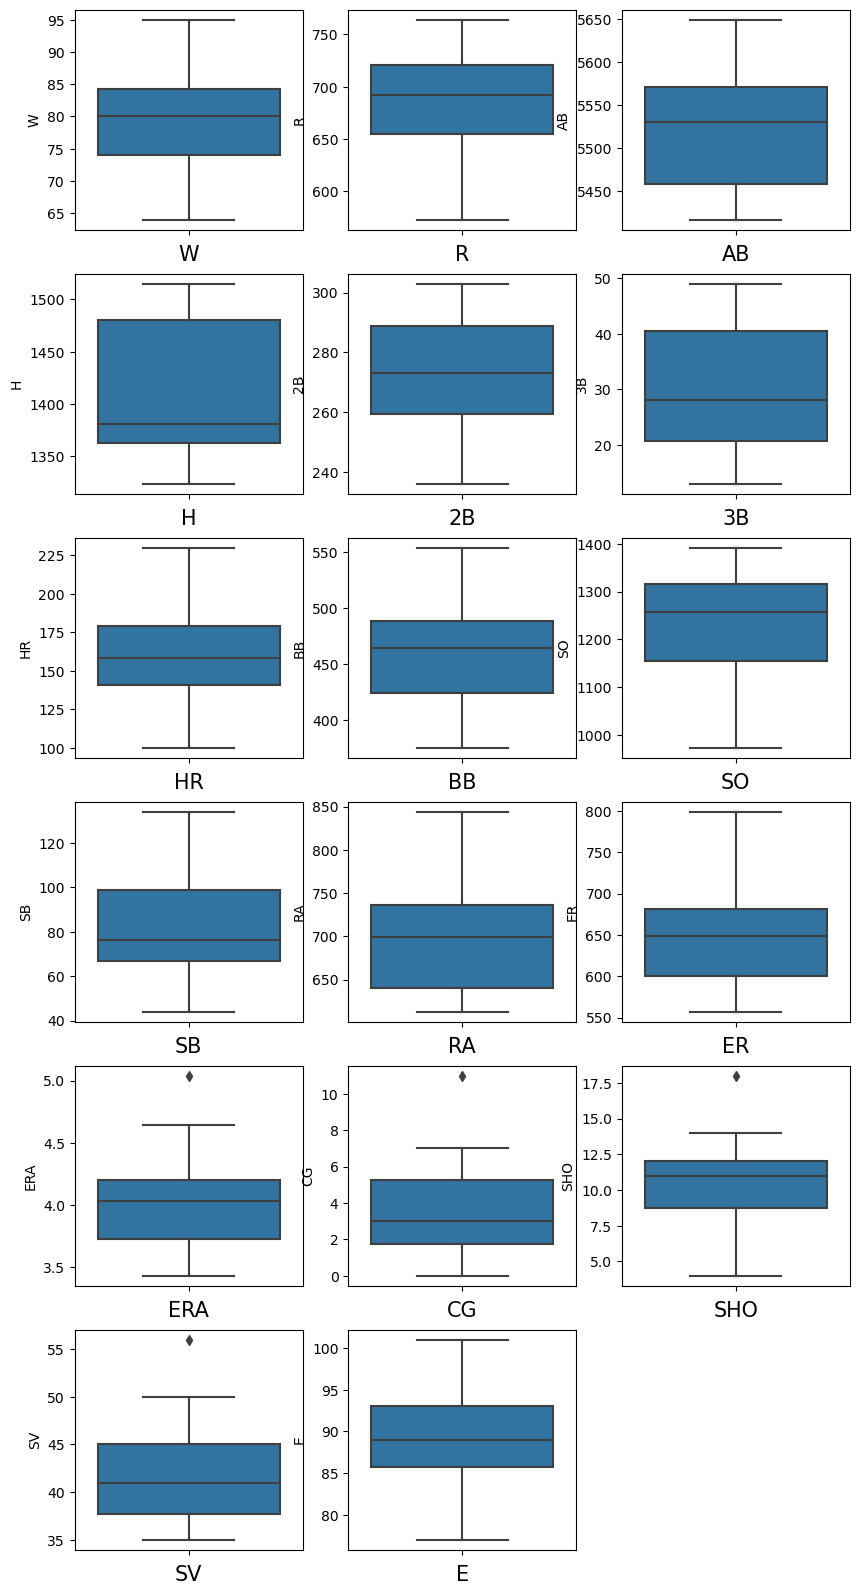

In [48]:

plt.figure(figsize=(10,20))
plotnumber =1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [47]:
df.shape

(20, 17)

Pre-processing and Model training

In [49]:
X= df.drop('W', axis=1)
y= df.W

# aplying standard scaler
scaler= StandardScaler()
X_fit=scaler.fit_transform(X)


In [93]:
# train test split

x_train,x_test,y_train,y_test= train_test_split(X_fit, y)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
from sklearn.model_selection import cross_val_score

Lr= LinearRegression()
Lr.fit(x_train,y_train)

y_pred= Lr.predict(x_test)

In [99]:
r2_train=r2(y_test, y_pred)
print("R square value: ",r2_train)

R square value:  -0.2509655825219861


In [103]:
from sklearn.linear_model import LogisticRegression, Lasso,LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

In [104]:
# For LogisticRegression
Lor= LogisticRegression()
Lor.fit(x_train,y_train)
y_pred_lo= Lor.predict(x_test)


In [105]:
# For Lasso regressor
La= Lasso()
La.fit(x_train,y_train)
y_pred_la= La.predict(x_test)

In [106]:
# For Ridge regressor
Rd= Ridge()
Rd.fit(x_train,y_train)
y_pred_rd= Rd.predict(x_test)

In [107]:
# RandomForest Regressor

RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred_rfr= RFR.predict(x_test)

In [108]:
#GradientBoostingRegressor

GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred_gbr= GBR.predict(x_test)

In [109]:
#KNeighborsRegressor

knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn= knn.predict(x_test)

In [110]:
#DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [111]:
# XGBoost

xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb= xgb.predict(x_test)

In [112]:
import math

def get_metrics(actual, preds, model_type):
    r2s = r2(actual, preds)
    maes = mae(actual, preds)
    mses = mse(actual, preds)
    rmses = math.sqrt(mses)
#return rmse, mse, mae, r2
    df1 = pd.DataFrame([r2s, maes, mses, rmses, model_type]).transpose()
    df1.columns = ['r2 coeff.', 'MAE', 'MSE', 'RMSE', 'Type of model']
    return df1
df_metrics = get_metrics(y_test, y_pred,  'Linear Regression')
df_metrics1 = get_metrics(y_test, y_pred_lo,  'Logistic Regression')
df_metrics2 = get_metrics(y_test, y_pred_la,  'Lasso Regression')
df_metrics3 = get_metrics(y_test, y_pred_rd,  'Ridge Regression')
df_metrics4 = get_metrics(y_test, y_pred_rfr,  'RF Regression')
df_metrics5 = get_metrics(y_test, y_pred_gbr,  'GB Regression')
df_metrics6 = get_metrics(y_test, y_pred_knn,  'Knn')
df_metrics7 = get_metrics(y_test, y_pred_dt,  'Decision Tree Regression')
df_metrics8 = get_metrics(y_test, y_pred_xgb,  'XGBoost')

df_metrics = pd.concat([df_metrics,df_metrics1,df_metrics2,df_metrics3,df_metrics4,df_metrics5,
                       df_metrics6,df_metrics7,df_metrics8])
df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,-0.250966,7.175894,69.853918,8.357866,Linear Regression
0,0.613181,4.4,21.6,4.64758,Logistic Regression
0,0.812042,1.734656,10.495563,3.239686,Lasso Regression
0,0.802315,2.565177,11.038736,3.322459,Ridge Regression
0,0.59643,3.682,22.53534,4.74714,RF Regression
0,0.615555,3.624728,21.467433,4.633296,GB Regression
0,0.526934,3.28,26.416,5.13965,Knn
0,0.516476,4.6,27.0,5.196152,Decision Tree Regression
0,0.218049,5.590167,43.664152,6.607886,XGBoost


Hyper paramerter tunning for Lasso Regressor

In [123]:
parameters = {'alpha':[1, 10]}

In [126]:
lasso_para= GridSearchCV(La,parameters, scoring='r2',cv=5)

In [127]:
lasso_para.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1, 10]},
             scoring='r2')

In [128]:
best_para= lasso_para.best_params_
best_para

{'alpha': 1}

In [134]:
la= Lasso(alpha=5)
la.fit(x_train,y_train)
y_pred_rd= la.predict(x_test)

r2_train=r2(y_test, y_pred_la)
print("R square value: ",r2_train)

R square value:  0.8120422025296192


In [135]:
import pickle
pickle.dump(la, open('Baseball_Case_Study.pkl', 'wb'))

In [136]:
pickled_model = pickle.load(open('Baseball_Case_Study.pkl', 'rb'))
pickled_model.predict(x_test)

array([77.57618366, 79.11931999, 78.50206546, 81.27971085, 79.42794725])